<h2><u>EXERCISE 4</u></h2>

In [2]:
import numpy as np
import json
import ijson # library used for reading the file one line at a time, because we can't load the whole file in memory


f1 = open('yelp_academic_dataset_business.json', encoding = "utf8")

torontoID = [] # Toronto businesses id's
businessReviewers = {} # mapping each toronto business id to its reviewer id's

for line in f1.readlines():
    dictionary = json.loads(line)
    if((dictionary['city'] == 'Toronto') and (dictionary['review_count'] >= 50)): # requirements
        torontoID.append(dictionary["business_id"])

torontoID = np.array(torontoID) 

usersID = [] # a list of all user id's
users_with_reviews = [] # stores the user id and a dictionary which stores the businesses he has rated and the ratings themselves

with open('yelp_academic_dataset_review.json', 'r', encoding = "UTF-8") as f:
    parser = ijson.parse(f, multiple_values = True)
    business_id = ""
    user_id = ""
    user_already_encountered = False
    businessInToronto = False # only if the business is in Toronto do we care about the rating
    
    for prefix, event, value in parser:
        if(prefix == "user_id"):
            user_id = value    
        elif(prefix == "business_id"):
            business_id = value

            if(business_id in torontoID):
                 businessInToronto = True
            else:
                businessInToronto = False
        elif(prefix == "stars"):
            if(businessInToronto == True):
                if(user_id in usersID):
                    user_already_encountered = True
                else:
                    user_already_encountered = False
                    usersID.append(user_id)

                if(user_already_encountered == True):
                    for element in users_with_reviews:
                        if(element["user_id"] == user_id):
                            element["businesses"][business_id] = value
                            break
                else:
                    user_with_reviews = {"user_id": user_id, "businesses": {business_id: value}}
                    users_with_reviews.append(user_with_reviews)
                    
                if(business_id in businessReviewers.keys()):
                    businessReviewers[business_id].append(user_id)
                else:
                    businessReviewers[business_id] = [user_id]
        

Below I count how many businesses and users don't meet the requirements to join sets B and U respectively.

In [3]:
users_with_inadequate_reviews_counter = 0

for i in range(len(users_with_reviews)):
    if(len(list(users_with_reviews[i]["businesses"].keys())) < 20):
        users_with_inadequate_reviews_counter += 1

print("Users with inadequate reviews:", users_with_inadequate_reviews_counter)
print("Total users:", len(users_with_reviews))

businesses_with_inadequate_reviewers_counter = 0

for business_id in (list(businessReviewers.keys())):
    if(len(businessReviewers[business_id]) < 50):
        businesses_with_inadequate_reviewers_counter += 1

print("Businesses with inadequate reviewers:", businesses_with_inadequate_reviewers_counter)
print("Total businesses:", len(list(businessReviewers.keys())))

Users with inadequate reviews: 94512
Total users: 97511
Businesses with inadequate reviewers: 0
Total businesses: 2846


Then, I only retain the elements that belong to the two sets.

In [4]:
changes_made = 1 
""" used for the while loop, this variable is set to 1 whenever a user/business is removed from the sets, 
which means we need to recheck if every user has reviewed at least 20 businesses from the same dataset and
if every business has been reviewed at least 50 times from users in the dataset"""  

while(changes_made):
    changes_made = 0
    users_to_be_removed = []
    businesses_to_be_removed = []
    
    for element in users_with_reviews:
        businesses = element["businesses"]
        businesses_ids = list(businesses.keys())
        if(len(businesses_ids) < 20):
            changes_made = 1
            users_to_be_removed.append(element)
            
            for business_id in businesses_ids:
                while(element["user_id"] in businessReviewers[business_id]): # need to remove every appearance of this id
                    businessReviewers[business_id].remove(element["user_id"])
                
    for user in users_to_be_removed:
        users_with_reviews.remove(user)
        
    for business_id in list(businessReviewers.keys()):
        if(len(businessReviewers[business_id]) < 50):
            changes_made = 1
            businesses_to_be_removed.append(business_id)
            
            for element in users_with_reviews:
                businesses = element["businesses"]
                if(business_id in list(businesses.keys())):
                   del businesses[business_id]
            
    for business_id in businesses_to_be_removed:
        del businessReviewers[business_id]

I check if every element that I retained meets the requirements.

In [5]:
users_with_inadequate_reviews_counter = 0

for i in range(len(users_with_reviews)):
    if(len(list(users_with_reviews[i]["businesses"].keys())) < 20):
        users_with_inadequate_reviews_counter += 1

print("Users with inadequate reviews:", users_with_inadequate_reviews_counter)
print("Total users:", len(users_with_reviews))

businesses_with_inadequate_reviewers_counter = 0

for business_id in (list(businessReviewers.keys())):
    if(len(businessReviewers[business_id]) < 50):
        businesses_with_inadequate_reviewers_counter += 1

print("Businesses with inadequate reviewers:", businesses_with_inadequate_reviewers_counter)
print("Total businesses:", len(list(businessReviewers.keys())))

Users with inadequate reviews: 0
Total users: 1185
Businesses with inadequate reviewers: 0
Total businesses: 533


In [6]:
print(users_with_reviews[0])

{'user_id': 'TZQSUDDcA4ek5gBd6BzcjA', 'businesses': {'qUWqjjjfpB2-4P3He5rsKw': Decimal('4.0'), '6n_MDeYxU1ihB38be9TkVA': Decimal('4.0'), 'SGP1jf6k7spXkgwBlhiUVw': Decimal('5.0'), 'orrhJxM6V1USwccG7MlxmA': Decimal('4.0'), 'fJ-2acaqvWOsujUTAJB-ew': Decimal('4.0'), '9KBd2YPnRxaNjZz23TUd6A': Decimal('5.0'), 'HgL6gGEGoAUBKGrT6BXU4Q': Decimal('2.0'), 'iAxsnFs3qq0Qx1EJ1S9SoQ': Decimal('3.0'), '0a2O150ytxrDjDzXNfRWkA': Decimal('4.0'), '8I5U8OQ06nSxX2y4PPOWzQ': Decimal('4.0'), 'd4P7boUqiA2pR59jOlzYLA': Decimal('4.0'), 'XOkqRJBS6HwTVlrCACAZFw': Decimal('4.0'), 'zA6gnF5aPBGoOm6uIbKt-A': Decimal('4.0'), 'c35qzLN6ItDpVIoj2uQW4Q': Decimal('5.0'), 'jc3p5SFyt9qrrMXt6E13ig': Decimal('4.0'), 'grZEbAsZwWA3yJMwDRl0Nw': Decimal('3.0'), 'vcxvQyAggPqxcHwvJXvjGg': Decimal('5.0'), 'iGEvDk6hsizigmXhDKs2Vg': Decimal('5.0'), '5m2JukTajxMk-qS5W4s-FA': Decimal('3.0'), 'jTZYireK6pnPb6Rni0jygw': Decimal('5.0'), 'oWTn2IzrprsRkPfULtjZtQ': Decimal('4.0'), 'vh1tPEaPioD78QmoqnWXpw': Decimal('4.0'), '6EVBc9kdc3Hd8KZkLVPnGA

I create the two sets.

In [7]:
U = []
B = list(businessReviewers.keys())

for i in range(len(users_with_reviews)):
    U.append(users_with_reviews[i]['user_id'])

In [8]:
friendships = [] # a list of every friendship in the U set

with open('yelp_academic_dataset_user.json', 'r', encoding = "UTF-8") as f:
    parser = ijson.parse(f, multiple_values = True)
    user_id = ""
    friends = []
    
    for prefix, event, value in parser:
        if(prefix == "user_id"):
            user_id = value
        if(prefix == "friends"):
            friends = value.split(",")
            if(user_id in U):
                for friend in friends:
                     if((friend in U) and ([user_id, friend] not in friendships) and ([friend, user_id] not in friendships)):
                            friendships.append([user_id, friend])
            
           

In [9]:
print(len(friendships))
for friendship in friendships:
    if((friendship[0] not in U) or (friendship[1] not in U)):
        print("Problem")
print(friendships)

234
[['MFnXQb1R1IGLL_-W4oflJw', 'djpMXOA1ic5wv3FPtubHNw'], ['xDed_RrQv7xuwOp9hESt9Q', 'Wu0yySWcHQ5tZ_59HNiamg'], ['AhoxHm569hH_PRkoegDwcA', '-hUgrj7Lzir3yLUYrMYQ4g'], ['alUuOskFSl1bODjnce2PpQ', 'o5hk57cqhWnV1sULPvq1jw'], ['MkFySOILZ4yhADa-0tZWZw', 'j6wLUT0ZXi-x0otelYIFpA'], ['Uwu72w77MPox942_GnCS7g', 'zh7csWc3GAUksnShzGp-WQ'], ['j6wLUT0ZXi-x0otelYIFpA', 'rK4I1CJLXCQSZIhigdJcnQ'], ['CxDOIDnH8gp9KXzpBHJYXw', 'Y109iXUmmcVwziHIes48sg'], ['52MlnjkvSLLqKKSRrbrH0w', 'CxDOIDnH8gp9KXzpBHJYXw'], ['9KS6i_CjljjOuBwhX195KQ', '-hUgrj7Lzir3yLUYrMYQ4g'], ['656Y-LLKJMBNUBkuRB4SyQ', 'djpMXOA1ic5wv3FPtubHNw'], ['P2E31XC7SP4v_3hXC2o0Xw', 'Wu0yySWcHQ5tZ_59HNiamg'], ['X5whw8WcB8dVZGZ5vGnSLg', 'TbhyP24zYZqZ2VJZgu1wrg'], ['yT_QCcnq-QGipWWuzIpvtw', '1HFkcIGKY7-e9vCsc8PX5g'], ['8HCEPF0IflyB690Q745fKg', 'YgC5A_oMsF4n7zOcSJ55tA'], ['XDYnGRhaCQteZNFPZonRow', 'DOZtiJTh6ZYsZJcXgPrdBg'], ['HFItzRohDHZvcKDrM6ABZg', 'YRcaNlwQ6XXPFDXWtuMGdA'], ['HAv4iHgSyMS4HKwl5hb98w', 'Uwu72w77MPox942_GnCS7g'], ['-hUgrj7Lzir3yLUYrMYQ4

In [10]:
user_indexes = {} # a dict which maps each user id to an index, starting by 0
index_counter = 0

for user_id in U:
    user_indexes[user_id] = index_counter
    index_counter += 1

I create and print the graph. It is obvious that mine is not connected. However, I will still work with the biggest connected subgraph.

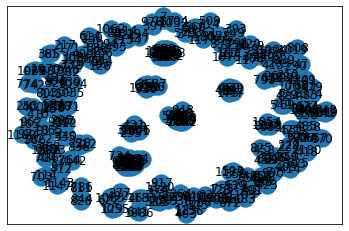

In [11]:
import networkx as nx
%matplotlib inline

graph_edges = []

for friendship in friendships:
    graph_edges.append((user_indexes[friendship[0]], user_indexes[friendship[1]]))

friendship_graph = nx.Graph()
friendship_graph.add_edges_from(graph_edges)
nx.draw_networkx(friendship_graph)

Extracting the maximum connected subgraph.

In [12]:
connected_subgraphs = [nx.subgraph(friendship_graph,c) for c in nx.connected_components(friendship_graph)]

max_subgraph = nx.Graph()
max_size = 0

for GC in connected_subgraphs:
    if(len(GC) > max_size):
        max_subgraph = GC
        max_size = len(GC)

print("Maximum friendship subgraph:")
print("Size:" ,len(max_subgraph))
print("Nodes:" ,max_subgraph.nodes())
print("Edges:" ,max_subgraph.edges())

Maximum friendship subgraph:
Size: 26
Nodes: [263, 275, 532, 411, 27, 31, 800, 42, 427, 555, 48, 54, 695, 832, 975, 464, 724, 603, 94, 113, 373, 502, 885, 633, 508, 766]
Edges: [(263, 42), (275, 42), (532, 42), (411, 42), (27, 724), (27, 42), (31, 42), (800, 42), (42, 464), (42, 427), (42, 555), (42, 502), (42, 373), (42, 766), (42, 633), (42, 885), (42, 975), (42, 603), (42, 832), (42, 508), (42, 113), (42, 48), (42, 695), (42, 54), (975, 94)]


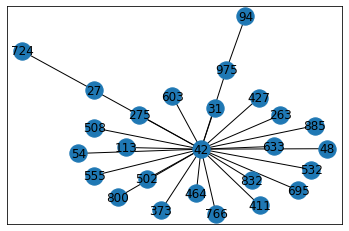

In [13]:
nx.draw_networkx(max_subgraph)

I only keep the ratings of the users that belong to this graph. I comment the structure of the users_with_reviews dictionary for future reference.

In [14]:
ratings = []
# user_with_reviews = {"user_id": user_id, "businesses": {business_id: value}}

for element in users_with_reviews:
    
    if(user_indexes[element["user_id"]] in max_subgraph.nodes()):
        for business_id in list(element["businesses"].keys()):
            if(business_id in B):
                ratings.append((element["user_id"], business_id, element["businesses"][business_id]))


I remove a random 5% of the ratings, as asked.

In [15]:
import random

number_of_ratings_to_be_removed = int(0.05 * len(ratings))
D_test = []

for i in range(number_of_ratings_to_be_removed):
    random_choice = random.randint(0, len(ratings) - 1)
    
    while(ratings[random_choice] in D_test): # we need to make sure we don't remove the same rating again
        random_choice = random.randint(0, len(ratings) - 1)
    
    D_test.append(ratings[random_choice])

In [16]:
D_train = []

for i in range(len(ratings)):
    if(ratings[i] not in D_test):
        D_train.append(ratings[i])

Below I implement a function that takes as parameter the absorbing nodes and their values (ratings) and computes the predictions using value propagation. This function will be used once for every prediction that must be calculated in the final value propagation function that is implemented in the next cells.

In [17]:
def calculate_ratings(absorbing_nodes, absorbing_nodes_values):
    nodes = max_subgraph.nodes()
    old_ratings = {}
    ratings = {}
    absorbing_counter = 0
    
    for node in nodes: # ratings initialisation
        if(node in absorbing_nodes):
            old_ratings[node] = absorbing_nodes_values[absorbing_counter]
            absorbing_counter += 1
        else:
            old_ratings[node] = 1 / len(max_subgraph)
        ratings[node] = 0
            
    eps = 0.000001
    
    while (True):
        for x in nodes:
            if(x not in absorbing_nodes):
                neighbours_sum = 0

                for y in nodes:
                    if((x,y) in max_subgraph.edges()):
                        neighbours_sum += old_ratings[y]
                        
                ratings[x] = neighbours_sum / max_subgraph.degree(x)
            else:
                ratings[x] = old_ratings[x]
            
        diff = 0
        for node in nodes:
            diff = max(diff, abs(ratings[node] - old_ratings[node]))
        if diff < eps: break

        for node in nodes:
            old_ratings[node] = ratings[node]
            ratings[node] = 0
    
    return ratings
                    

The final function and its usage.

In [57]:
def value_propagation(D_test, D_train):
    predictions = []
    
    for rating in D_test:
        b = rating[1] # the business
        train_ratings = [] # the ratings in the training collection for business b
        
        for train_rating in D_train:
            if(train_rating[1] == b):
                train_ratings.append(train_rating)
             
        absorbing_nodes = []
        absorbing_nodes_values = []
        for train_rating in train_ratings:
            absorbing_nodes.append(user_indexes[train_rating[0]])
            absorbing_nodes_values.append(float(train_rating[2]))
            
        returned_ratings = calculate_ratings(absorbing_nodes, absorbing_nodes_values)
        predictions.append(returned_ratings[user_indexes[rating[0]]])
        
    return predictions
        
predictions = value_propagation(D_test, D_train)

for i in range(len(D_test)):
    print("Removed rating:", D_test[i][2], "Prediction:", predictions[i])

Removed rating: 3.0 Prediction: 3.9999904231367656
Removed rating: 3.0 Prediction: 2.6666606491462863
Removed rating: 5.0 Prediction: 0.038461538461538464
Removed rating: 5.0 Prediction: 3.9999981109912577
Removed rating: 3.0 Prediction: 3.9999776930039386
Removed rating: 5.0 Prediction: 3.9999776930039386
Removed rating: 3.0 Prediction: 3.9999776930039386
Removed rating: 5.0 Prediction: 4.19998917027551
Removed rating: 2.0 Prediction: 0.038461538461538464
Removed rating: 5.0 Prediction: 4.0
Removed rating: 5.0 Prediction: 0.038461538461538464
Removed rating: 3.0 Prediction: 0.038461538461538464
Removed rating: 5.0 Prediction: 4.249995757411274
Removed rating: 4.0 Prediction: 5.0
Removed rating: 4.0 Prediction: 0.038461538461538464
Removed rating: 4.0 Prediction: 4.571425653533901
Removed rating: 3.0 Prediction: 5.0
Removed rating: 3.0 Prediction: 2.999999293914208
Removed rating: 4.0 Prediction: 1.9999782293210198
Removed rating: 5.0 Prediction: 2.99999401352891
Removed rating: 5.0 Pr

For the UCF and ICF functions I should construct the global lists and dictionaries they user in order not to change their own structure from the previous sets.

In [38]:
business_indexes = {}
removedUserPositions = []
removedBusinessPositions = []
removedRatings = []

b_counter = 0
for business_id in B:
    business_indexes[business_id] = b_counter
    b_counter += 1
    
for rating in D_test:
    removedUserPositions.append(user_indexes[rating[0]])
    removedBusinessPositions.append(business_indexes[rating[1]])
    removedRatings.append(float(rating[2]))

In [39]:
from scipy import sparse

user_indices = []
business_indices = []
only_ratings = []


for rating in ratings:
    user_indices.append(user_indexes[rating[0]])
    business_indices.append(business_indexes[rating[1]])
    only_ratings.append(float(rating[2]))

user_indicesNP = np.array(user_indices)
business_indicesNP = np.array(business_indices)
ratingsNP = np.array(only_ratings)

R = sparse.csr_matrix((ratingsNP, (user_indicesNP, business_indicesNP)))

In [40]:
business_rated_by = {}

for rating in ratings:
    if(business_indexes[rating[1]] in list(business_rated_by.keys())):
        business_rated_by[business_indexes[rating[1]]].append(user_indexes[rating[0]])
    else:
        business_rated_by[business_indexes[rating[1]]] = [user_indexes[rating[0]]]
    

In [46]:
user_has_reviewed = {}

for rating in ratings:
    if(user_indexes[rating[0]] in list(user_has_reviewed.keys())):
        user_has_reviewed[user_indexes[rating[0]]].append(business_indexes[rating[1]])
    else:
        user_has_reviewed[user_indexes[rating[0]]] = [business_indexes[rating[1]]]

From now on I paste the old methods and run them so as to compare the results with the new value propagation method.

In [45]:
from sklearn import metrics
import math

#User-Based Collaborative Filtering (UCF)

def UCF(k):
    similarity_matrix = metrics.pairwise.cosine_similarity(R, Y=None, dense_output=True)
    u_pos = -1 # index that will be used to get each user index from the removedUserPositions list

    predicted_missing_ratings = []
    R_Array = R.toarray()
   
    for b in removedBusinessPositions:
        u_pos += 1
        u = removedUserPositions[u_pos]

        users_that_reviewed = business_rated_by[b] # we need all the users that reviewed this business for similarity computations

        if u in users_that_reviewed:
            users_that_reviewed.remove(u) # the same user shouldn't appear twice

        
        user_similarities = []
        user_dict = {}

        for user in users_that_reviewed: # get the similarities with each user that reviewed the same business
            similarity = similarity_matrix[user, u]
            user_similarities.append(similarity)
            user_dict[similarity] = user

        user_similarities = np.array(user_similarities)
        k_most_similar_similarities = []
        
        if(len(user_similarities) > k):
            k_most_similar_similarities = np.partition(user_similarities, -k)[-k:]
        else: # in this case we have less than k users that reviewed the same business, so we keep all the users
            k_most_similar_similarities = user_similarities
        k_most_similar_users = []
        k_most_similar_ratings = []

        for similarity in k_most_similar_similarities: # store the k most similar users
            k_most_similar_users.append(user_dict[similarity])

        for user in k_most_similar_users: # store the ratings of those users
            k_most_similar_ratings.append(R_Array[user,b])    

        k_most_similar_ratings = np.array(k_most_similar_ratings)
        predicted_rating = np.inner(k_most_similar_similarities, k_most_similar_ratings) / np.sum(k_most_similar_similarities)
        if(not math.isnan(predicted_rating)):
            predicted_missing_ratings.append(predicted_rating)
        else:
            predicted_missing_ratings.append(0)
        
    return predicted_missing_ratings

predictions = UCF(10) # testing the method and printing its results

for i in range(len(predictions)):
    print("Removed rating: ", removedRatings[i], " Prediction: ", predictions[i] )
    

Removed rating:  3.0  Prediction:  4.0702076693708635
Removed rating:  3.0  Prediction:  2.882300865972047
Removed rating:  5.0  Prediction:  0
Removed rating:  5.0  Prediction:  3.9999999999999996
Removed rating:  3.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  4.0
Removed rating:  3.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  4.29245370963001
Removed rating:  2.0  Prediction:  0
Removed rating:  5.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  0
Removed rating:  3.0  Prediction:  0
Removed rating:  5.0  Prediction:  4.279059587362055
Removed rating:  4.0  Prediction:  5.0
Removed rating:  4.0  Prediction:  0
Removed rating:  4.0  Prediction:  4.481499719473483
Removed rating:  3.0  Prediction:  4.741845589564339
Removed rating:  3.0  Prediction:  3.0875708815256653
Removed rating:  4.0  Prediction:  2.0
Removed rating:  5.0  Prediction:  2.6045033764318073
Removed rating:  5.0  Prediction:  2.9999999999999996
Removed rating:  4.0  Prediction:  5.0000000000

<ipython-input-45-dbb79439433a>:48: RuntimeWarning: invalid value encountered in double_scalars
  predicted_rating = np.inner(k_most_similar_similarities, k_most_similar_ratings) / np.sum(k_most_similar_similarities)


In [47]:
# Item-Based Collaborative Filtering (ICF)

def ICF(k):
    R_Transposed = R.transpose()

    similarity_transposed_matrix = metrics.pairwise.cosine_similarity(R_Transposed, Y=None, dense_output=True)
    predicted_missing_ratings = []

    R_Transposed_Array = R_Transposed.toarray()
    b_pos = -1

    for u in removedUserPositions:
        b_pos += 1
        b = removedBusinessPositions[b_pos]

        reviewed_businesses = user_has_reviewed[u]

        if(b in reviewed_businesses):
            reviewed_businesses.remove(b)

        business_similarities = []
        business_dict = {}

        for business in reviewed_businesses:
            similarity = similarity_transposed_matrix[business, b]
            business_similarities.append(similarity)
            business_dict[similarity] = business

        k_most_similar_similarities = []
        
        if(len(business_similarities) > k):
            business_similarities = np.array(business_similarities)
            k_most_similar_similarities = np.partition(business_similarities, -k)[-k:]
        else:
            k_most_similar_similarities = np.array(business_similarities)
            
        k_most_similar_businesses = []
        k_most_similar_ratings = []

        for similarity in k_most_similar_similarities:
            k_most_similar_businesses.append(business_dict[similarity])

        for business in k_most_similar_businesses:
            k_most_similar_ratings.append(R_Transposed_Array[business,u])    

        k_most_similar_ratings = np.array(k_most_similar_ratings)

        predicted_rating = np.inner(k_most_similar_similarities, k_most_similar_ratings) / np.sum(k_most_similar_similarities)
        predicted_missing_ratings.append(predicted_rating)
        
    return predicted_missing_ratings

predictions = ICF(5) # testing the method and printing its results

for i in range(len(predictions)):
    print("Removed rating: ", removedRatings[i], " Prediction: ", predictions[i] )  

Removed rating:  3.0  Prediction:  3.3997326944598885
Removed rating:  3.0  Prediction:  4.816999245912962
Removed rating:  5.0  Prediction:  4.184110408623187
Removed rating:  5.0  Prediction:  4.058100666845165
Removed rating:  3.0  Prediction:  4.373108943650105
Removed rating:  5.0  Prediction:  3.392216560546554
Removed rating:  3.0  Prediction:  3.0000000000000004
Removed rating:  5.0  Prediction:  4.0144080703714
Removed rating:  2.0  Prediction:  3.8239597465725823
Removed rating:  5.0  Prediction:  4.229277635121901
Removed rating:  5.0  Prediction:  4.0
Removed rating:  3.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  4.770555016510925
Removed rating:  4.0  Prediction:  3.8009798009967937
Removed rating:  4.0  Prediction:  4.197592063513177
Removed rating:  4.0  Prediction:  3.6560852763319125
Removed rating:  3.0  Prediction:  3.622658638707163
Removed rating:  3.0  Prediction:  3.948193531677208
Removed rating:  4.0  Prediction:  4.207925771784096
Removed rating:  5

In [48]:
# User Average (UA)

def UA():
    predicted_missing_ratings = []
    R_Array = R.toarray()

    for u in removedUserPositions:
        listOfBusinesses = user_has_reviewed[u] # the user_has_reviewed dictionary maps each user index to the business indices of the businesses that the user has rated
        user_ratings = []
        
        for i in range(len(listOfBusinesses)):
            user_ratings.append(R_Array[u][listOfBusinesses[i]])
            
        user_ratings = np.array(user_ratings)
        predicted_missing_ratings.append(np.mean(user_ratings))
        
    return predicted_missing_ratings
        
predictions = UA() # testing the method

for i in range(len(predictions)):
    print("Removed rating: ", removedRatings[i], " Prediction: ", predictions[i] ) 

Removed rating:  3.0  Prediction:  3.2421052631578946
Removed rating:  3.0  Prediction:  4.251798561151079
Removed rating:  5.0  Prediction:  4.454545454545454
Removed rating:  5.0  Prediction:  4.0344827586206895
Removed rating:  3.0  Prediction:  4.251798561151079
Removed rating:  5.0  Prediction:  3.789473684210526
Removed rating:  3.0  Prediction:  3.2421052631578946
Removed rating:  5.0  Prediction:  4.251798561151079
Removed rating:  2.0  Prediction:  3.6
Removed rating:  5.0  Prediction:  3.942857142857143
Removed rating:  5.0  Prediction:  3.942857142857143
Removed rating:  3.0  Prediction:  4.25531914893617
Removed rating:  5.0  Prediction:  3.475
Removed rating:  4.0  Prediction:  3.2421052631578946
Removed rating:  4.0  Prediction:  3.526315789473684
Removed rating:  4.0  Prediction:  3.727272727272727
Removed rating:  3.0  Prediction:  3.2421052631578946
Removed rating:  3.0  Prediction:  4.185185185185185
Removed rating:  4.0  Prediction:  3.857142857142857
Removed rating:

In [50]:
# Business Average (BA)

def BA():
    predicted_missing_ratings = []
    R_Array = R.toarray()

    for b in removedBusinessPositions:
        usersThatReviewed = business_rated_by[b]
        business_ratings = []
        
        for i in range(len(usersThatReviewed)):
            business_ratings.append(R_Array[usersThatReviewed[i]][b])
        
        business_ratings = np.array(business_ratings)
        predicted_rating = np.mean(business_ratings)
        if(not math.isnan(predicted_rating)):
            predicted_missing_ratings.append(predicted_rating)
        else:
            predicted_missing_ratings.append(0)
        
    return predicted_missing_ratings

predictions = BA() # testing the method

for i in range(len(predictions)):
    print("Removed rating: ", removedRatings[i], " Prediction: ", predictions[i] ) 

Removed rating:  3.0  Prediction:  4.0
Removed rating:  3.0  Prediction:  2.6666666666666665
Removed rating:  5.0  Prediction:  0
Removed rating:  5.0  Prediction:  4.0
Removed rating:  3.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  4.0
Removed rating:  3.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  4.333333333333333
Removed rating:  2.0  Prediction:  0
Removed rating:  5.0  Prediction:  4.0
Removed rating:  5.0  Prediction:  0
Removed rating:  3.0  Prediction:  0
Removed rating:  5.0  Prediction:  4.25
Removed rating:  4.0  Prediction:  5.0
Removed rating:  4.0  Prediction:  0
Removed rating:  4.0  Prediction:  4.25
Removed rating:  3.0  Prediction:  4.5
Removed rating:  3.0  Prediction:  3.25
Removed rating:  4.0  Prediction:  2.0
Removed rating:  5.0  Prediction:  3.0
Removed rating:  5.0  Prediction:  3.0
Removed rating:  4.0  Prediction:  5.0
Removed rating:  3.0  Prediction:  0
Removed rating:  3.0  Prediction:  4.333333333333333
Removed rating:  4.0  Predicti

In [51]:
def calculate_RMSE(removed_ratings, predictions):
    n = len(removed_ratings)
    the_sum = 0

    for i in range(n):
        the_sum += (removed_ratings[i] - predictions[i])**2
    
    return(math.sqrt(the_sum / n))

In [52]:
# calculating the (constant) baseline error values for the graphs

UA_Error = calculate_RMSE(removedRatings, UA())
BA_Error = calculate_RMSE(removedRatings, BA())

print(UA_Error, BA_Error)

0.8212576085380461 1.7919200222820058


In [55]:
k_values = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

UCF_RMSE = []
ICF_RMSE = []

for k in k_values:
    UCF_RMSE.append(calculate_RMSE(removedRatings, UCF(k)))
    ICF_RMSE.append(calculate_RMSE(removedRatings, ICF(k)))
    
print(UCF_RMSE)
print(ICF_RMSE)

[1.80534186769688, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453, 1.7939571897680453]
[1.0274023338281628, 0.8504179441221533, 0.8234346895750159, 0.7813725571707091, 0.7791620675729207, 0.7833152896285623, 0.7801730078805685, 0.7766479248207612, 0.7725137803876815, 0.774452599486689, 0.775624121884959, 0.7760742840592997]


<ipython-input-45-dbb79439433a>:48: RuntimeWarning: invalid value encountered in double_scalars
  predicted_rating = np.inner(k_most_similar_similarities, k_most_similar_ratings) / np.sum(k_most_similar_similarities)


In [58]:
value_propagation_error = calculate_RMSE(removedRatings, value_propagation(D_test, D_train))
print(value_propagation_error)

1.7946303357706679


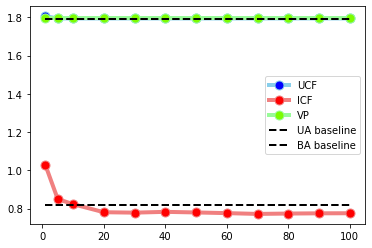

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

UA_RMSE = len(k_values) * [UA_Error]
BA_RMSE = len(k_values) * [BA_Error]
VP_RMSE = len(k_values) * [value_propagation_error]

df = pd.DataFrame({'k_values': k_values,  'UCF_RMSE': UCF_RMSE,
                  'ICF_RMSE': ICF_RMSE, 'VP_RMSE': VP_RMSE, 'UA_RMSE': UA_RMSE, 'BA_RMSE': BA_RMSE})
 
# multiple line plot
plt.plot( 'k_values', 'UCF_RMSE', data=df, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4, label='UCF')
plt.plot( 'k_values', 'ICF_RMSE', data=df, marker='o', markerfacecolor='red', markersize=9, color='lightcoral', linewidth=4, label='ICF')
plt.plot( 'k_values', 'VP_RMSE', data=df, marker='o', markerfacecolor='lawngreen', markersize=9, color='palegreen', linewidth=4, label='VP')
plt.plot( 'k_values', 'UA_RMSE', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="UA baseline")
plt.plot( 'k_values', 'BA_RMSE', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="BA baseline")
plt.legend()